In [59]:
#Imports

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as i
from scipy.integrate import quad
import time as t

#Constant Parameters 

m_0 = 1.0                                          #m=sqrt(x**2+y**2+(z/q)**2)
n = 4.0                                            #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
r_0 = 1/(7.69**4)                                  #characteristic radius (kpc) (instead of 1.4)

In [50]:
#integrate

#start = t.time()

f = lambda x,m: (
    (np.exp
     (-np.power(x/r_0, (1/n)))
    )*
    (np.power(x/r_0, ((1/n)-1))))/(np.sqrt((x**2)-(m**2))                                                                    
                                  );

I = quad(f, m_0, np.inf,args=(m_0,))

print(I)

#end = t.time()
#print(end-start)

#Timed; no need to avoid caching.

(8.187090669006348e-07, 2.679798996637789e-11)


In [51]:
#Define g

g = lambda m: quad(f, m, np.inf,args=(m,))[0]

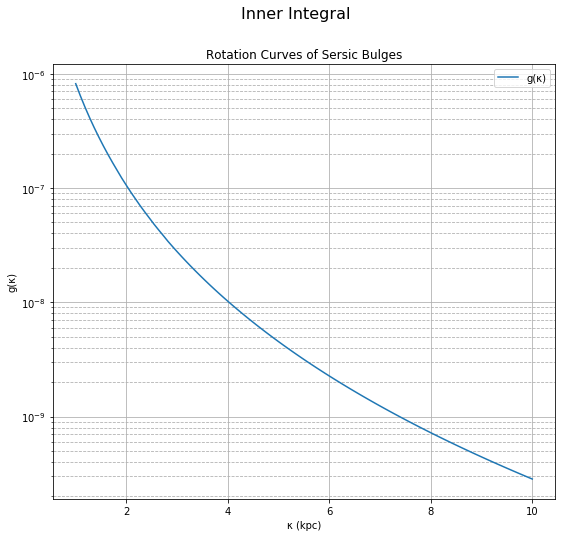

In [52]:
# Plotting

#adjusting the plot
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                        #x from/to and line smoothness
gv = np.vectorize(g)

#functions
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

#plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
#labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

plt.legend();                                      #adding legend

In [67]:
#parameters
I_0 = 1.08e3                                        #central surface brightness (20 mag/arcsec^2 = 1.08e3 cd/km^2)
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
ups = 2.8                                           #mass-to-light ratio (from Rotation Curves of Sersic Bulges paper)
q = 0.33                                            #intrinsic axis ratio
i = 40*(np.pi/180)                                  #inclination angle

#equations
C = (4*G*q*ups*I_0)/(r_0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)
x = np.linspace(0.1, 10, 200)

h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))
#l = lambda r: quad(h, 1, r)[0]
y = np.zeros(np.shape(x))

for j,r in enumerate(x):
    y[j] = quad(h, 0, r,args=(r,))[0]

#Cell total time with loop: 165s
#Cell total time without loop: <1ms

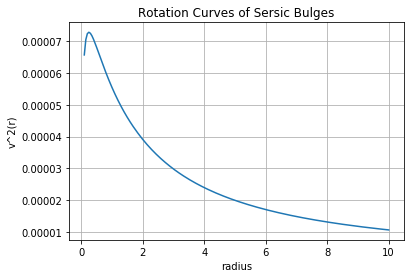

In [68]:
# Plotting

#fig = plt.figure(figsize=(9.0,8.0))                #size of the plot 
#time: 1ms

ax2 = plt.axes() #time: 20-25 ms
ax2.grid(True)
#ax2.yaxis.grid(True,which='minor',linestyle='--') #time: 0-1ms
#total axis time: 20-25ms


#x = np.linspace(1, 10, 100)                    #x from/to and line smoothness
#lv = np.vectorize(l)

# functions

#plt.plot(x, lv(x), linestyle='solid', label='Velocity Squared')          
plt.plot(x, y, linestyle='solid', label='Velocity Squared')


#plt.axis('tight');                                #xmin, xmax, ymin, ymax
#time: 2-3ms                                       #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
#labeling plots
fig.suptitle('Velocity Squared', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='v^2(r)');

#plt.legend(fontsize=14);                                   #adding legend
#time: 2ms

#plt.show()                                          
#time: 250ms

#plt.savefig('testing')
#time if already rendered: 17ms
#time if rendering for the first time now: 125ms

#Cell total time if rendering via savefig: 150ms
#Cell total time if using plt.show() and not savefig: 250ms
#Cell total time if not using show or savefig: 25ms (Still renders)
#Cell total time if using show AND savefig: 275ms

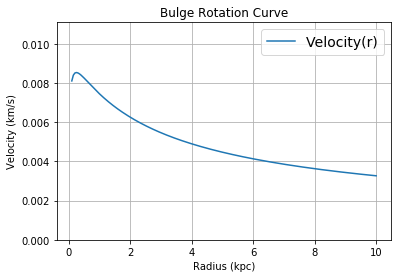

In [58]:
v = np.sqrt(y)

#fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')


#functions
plt.plot(x, v, linestyle='solid', label='Velocity(r)')          

#plt.axis('tight');                             #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
ax3.set_ylim(0,np.max(v)*1.3)
ax3.set(title='Bulge Rotation Curve')              #labeling axes
ax3.set(xlabel='Radius (kpc)', ylabel='Velocity (km/s)');

plt.legend(fontsize=14);                                   #adding legend
#plt.tight_layout()
#plt.savefig('AV_Bulge_Rotation_Curve_n4.png')
#plt.show()